In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (15, 10)

In [3]:
train = pd.read_csv('data/credit_train_clean_loc.csv.zip', index_col='client_id', compression='gzip')
test = pd.read_csv('data/credit_test_clean_loc.csv.zip', index_col='client_id', compression='gzip').drop(['open_account_flg'], axis = 1)

In [28]:
train.columns

Index(['age', 'credit_month', 'credit_sum', 'education', 'gender',
       'job_position', 'marital_status', 'monthly_income', 'open_account_flg',
       'score_shk', 'tariff_id', 'lat', 'lon', 'overdue_credit_count',
       'credit_count'],
      dtype='object')

In [4]:
train.describe()

,age,credit_month,credit_sum,monthly_income,open_account_flg,score_shk,lat,lon,overdue_credit_count,credit_count
count,170746.000000,170746.000000,170746.000000,170746.000000,170746.000000,170746.000000,170746.000000,170746.000000,170746.000000,170746.000000
mean,36.497283,10.980749,26095.047799,40138.258261,0.176028,0.469473,55.361796,54.856124,0.045992,2.071400
std,10.546008,3.536698,16234.794320,25044.135085,0.380845,0.124268,5.305942,25.442360,0.206140,1.739792
min,18.000000,3.000000,2736.000000,5000.000000,0.000000,0.000000,42.869937,21.229930,0.000000,0.000000
25%,28.000000,10.000000,14908.000000,25000.000000,0.000000,0.379495,53.276350,37.617635,0.000000,1.000000
50%,34.000000,10.000000,21229.000000,35000.000000,0.000000,0.461599,55.755814,44.634151,0.000000,2.000000
75%,43.000000,12.000000,32068.000000,50000.000000,0.000000,0.552419,58.586755,61.530761,0.000000,3.000000
max,71.000000,36.000000,200000.000000,950000.000000,1.000000,1.128291,67.714212,174.432311,3.000000,21.000000


In [5]:
test.describe()

,age,credit_month,credit_sum,monthly_income,score_shk,lat,lon,overdue_credit_count,credit_count
count,91940.000000,91940.000000,91940.000000,91940.000000,91940.000000,91940.000000,91940.000000,91940.000000,91940.000000
mean,36.461127,10.981336,26068.147740,40083.121503,0.469269,55.330433,54.812100,0.045773,2.073614
std,10.512266,3.551548,16228.036303,24652.577792,0.124616,5.306794,25.349594,0.205962,1.735330
min,18.000000,3.000000,3000.000000,0.000000,0.000000,42.869937,21.229930,0.000000,0.000000
25%,28.000000,10.000000,14865.252500,25000.000000,0.379118,53.276350,37.617635,0.000000,1.000000
50%,34.000000,10.000000,21141.000000,35000.000000,0.461158,55.755814,44.634151,0.000000,2.000000
75%,43.000000,12.000000,31990.000000,50000.000000,0.552029,58.586755,61.530761,0.000000,3.000000
max,71.000000,36.000000,200000.000000,700000.000000,1.255892,67.714212,174.432311,3.000000,22.000000


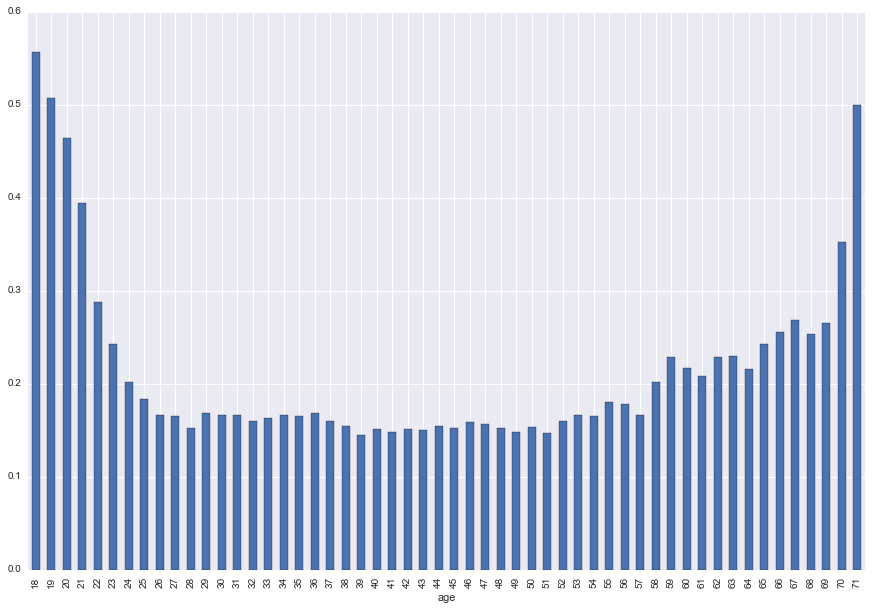

In [26]:
train.groupby(['age']).mean()['open_account_flg'].plot.bar()

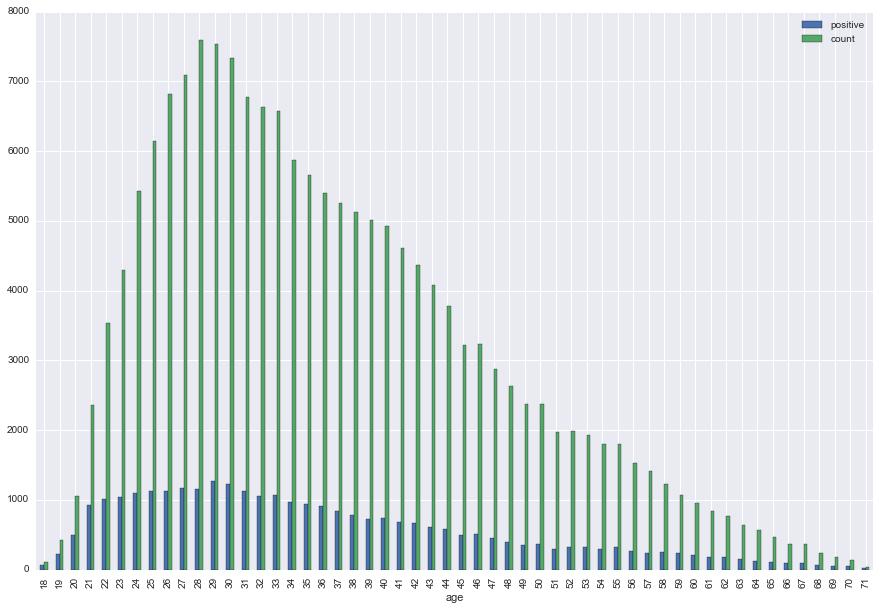

In [52]:
train.groupby(['age'])['open_account_flg'].agg({'count': np.size, 'positive': np.sum}).plot.bar()

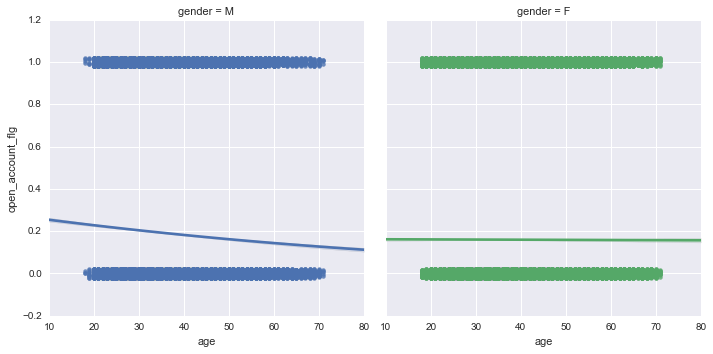

In [48]:
sns.lmplot(x="age", y="open_account_flg", col="gender", hue="gender", data=train, y_jitter=.02, logistic=True)

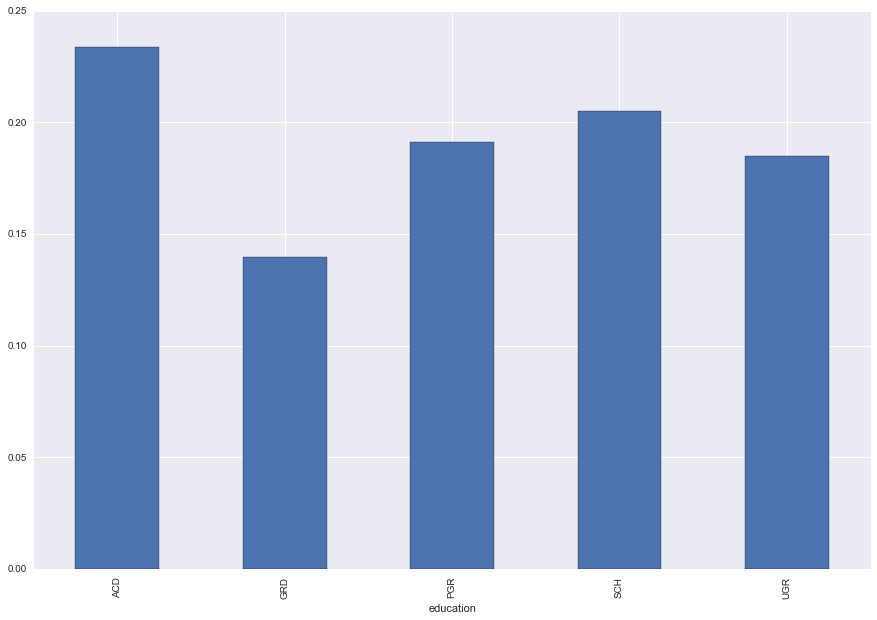

In [29]:
train.groupby(['education']).mean()['open_account_flg'].plot.bar()

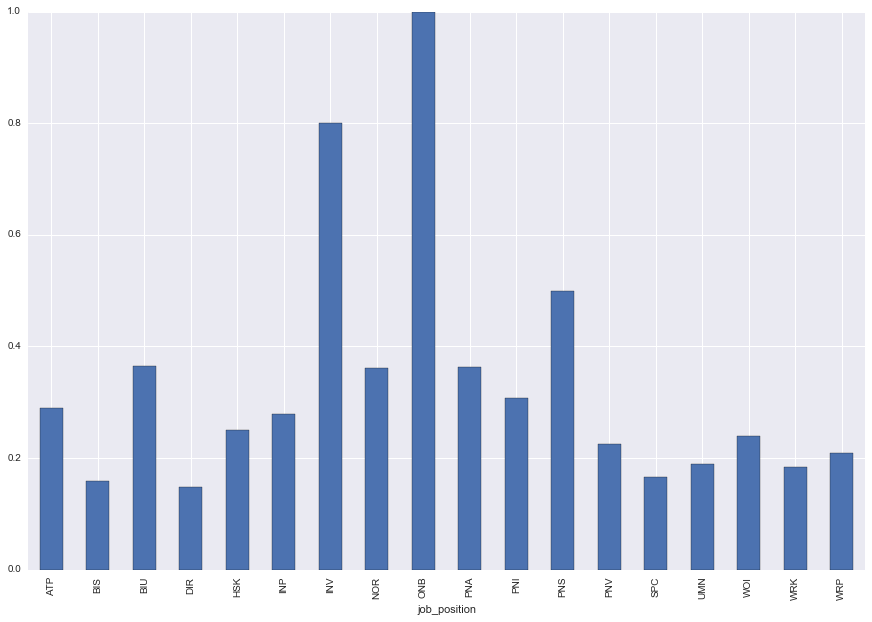

In [30]:
train.groupby(['job_position']).mean()['open_account_flg'].plot.bar()

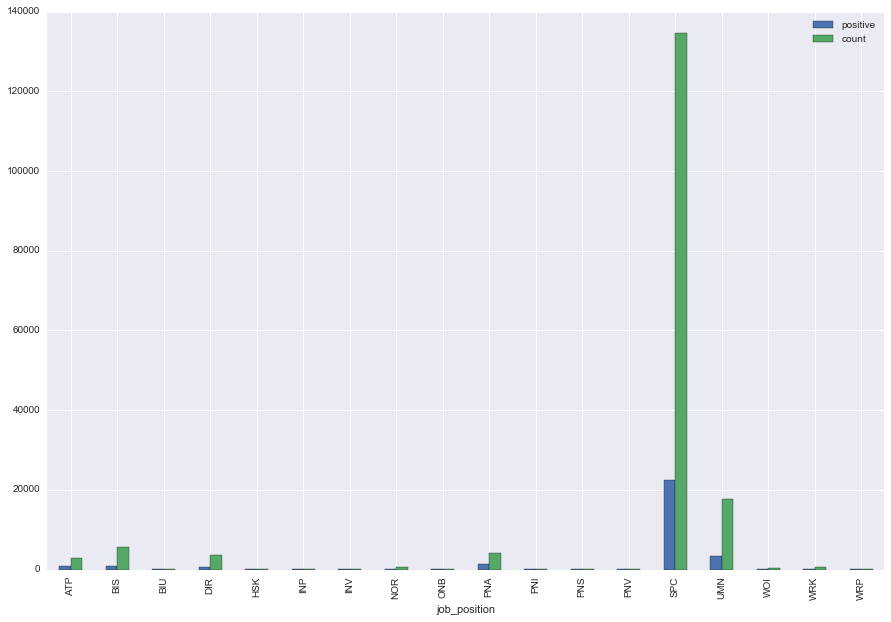

In [45]:
train.groupby(['job_position'])['open_account_flg'].agg({'count': np.size, 'positive': np.sum}).plot.bar()

In [79]:
agg = train.groupby(['job_position'])['open_account_flg'].agg({'count': np.size, 'positive': np.sum, 'mean': np.mean})
agg

,positive,count,mean
job_position,,,
ATP,807.0,2791.0,0.289144
BIS,885.0,5591.0,0.158290
BIU,46.0,126.0,0.365079
DIR,555.0,3750.0,0.148000
HSK,2.0,8.0,0.250000
INP,67.0,241.0,0.278008
INV,4.0,5.0,0.800000
NOR,194.0,537.0,0.361266
ONB,1.0,1.0,1.000000


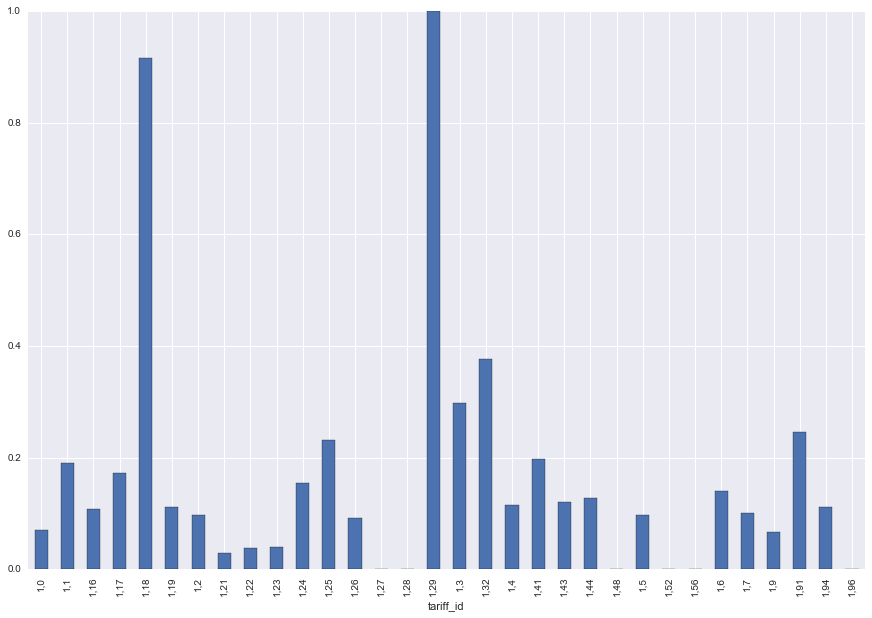

In [33]:
train.groupby(['tariff_id']).mean()['open_account_flg'].plot.bar()

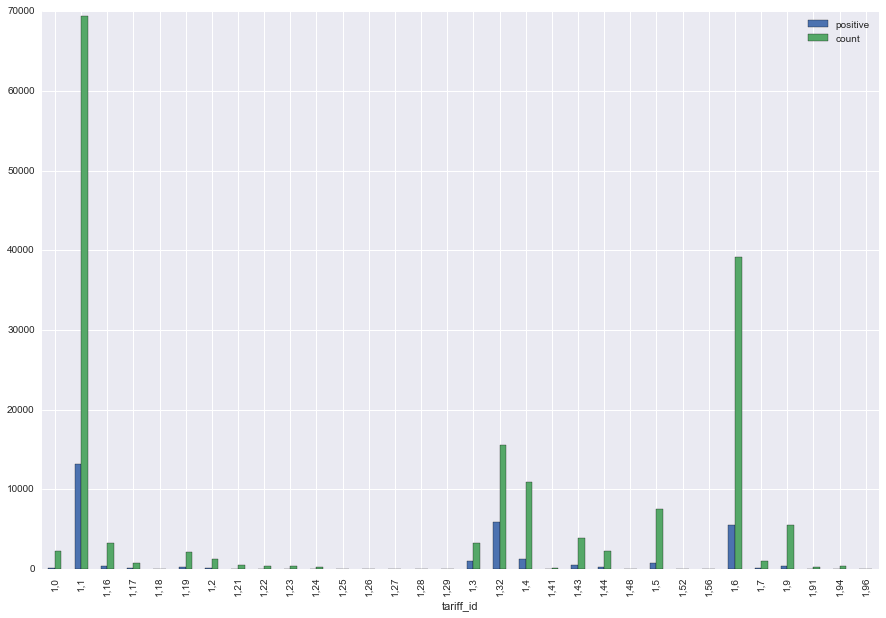

In [43]:
train.groupby(['tariff_id'])['open_account_flg'].agg({'count': np.size, 'positive': np.sum}).plot.bar()

In [62]:
tariff = train.groupby(['tariff_id'])['open_account_flg'].agg({'count': np.size, 'positive': np.sum, 'mean': np.mean})
tariff[tariff['mean'] > 0.9]

,positive,count,mean
tariff_id,,,
"1,18",33.0,36.0,0.916667
"1,29",1.0,1.0,1.000000


In [81]:
tariff[tariff['mean'] < 0.1]

,positive,count,mean
tariff_id,,,
"1,0",159.0,2245.0,0.070824
"1,2",127.0,1306.0,0.097243
"1,21",17.0,579.0,0.029361
"1,22",14.0,376.0,0.037234
"1,23",15.0,370.0,0.040541
"1,26",1.0,11.0,0.090909
"1,27",0.0,6.0,0.000000
"1,28",0.0,10.0,0.000000
"1,48",0.0,5.0,0.000000


In [67]:
tariff[(tariff['mean'] >= 0.1) & (tariff['mean'] <= 0.9)]

,positive,count,mean
tariff_id,,,
"1,1",13190.0,69355.0,0.190181
"1,16",349.0,3232.0,0.107983
"1,17",123.0,717.0,0.171548
"1,19",235.0,2102.0,0.111798
"1,24",47.0,303.0,0.155116
"1,25",13.0,56.0,0.232143
"1,3",992.0,3339.0,0.297095
"1,32",5866.0,15537.0,0.377550
"1,4",1253.0,10970.0,0.114221


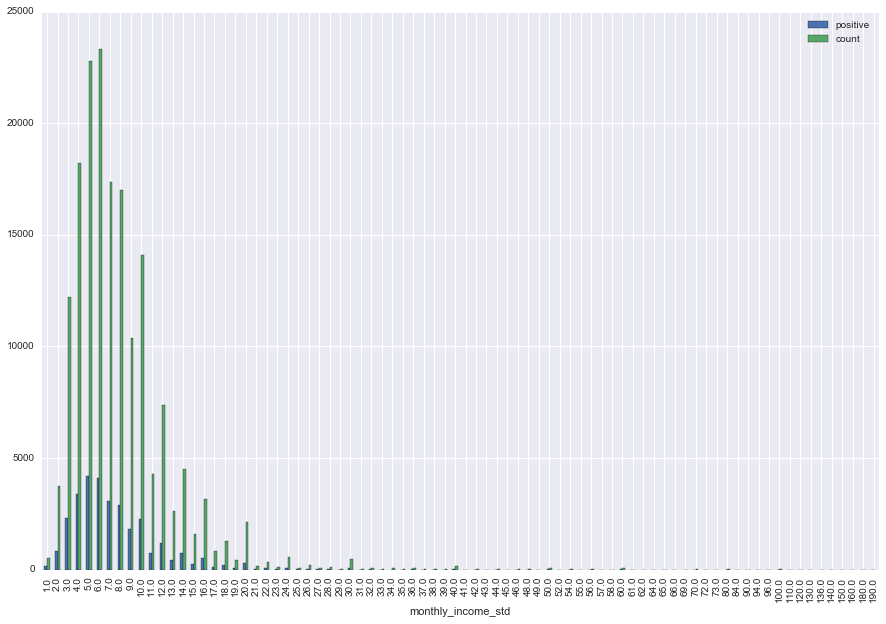

In [101]:
train['monthly_income_std'] = train['monthly_income'] // 5000
train.groupby(['monthly_income_std'])['open_account_flg'].agg({'count': np.size, 'positive': np.sum}).plot.bar()

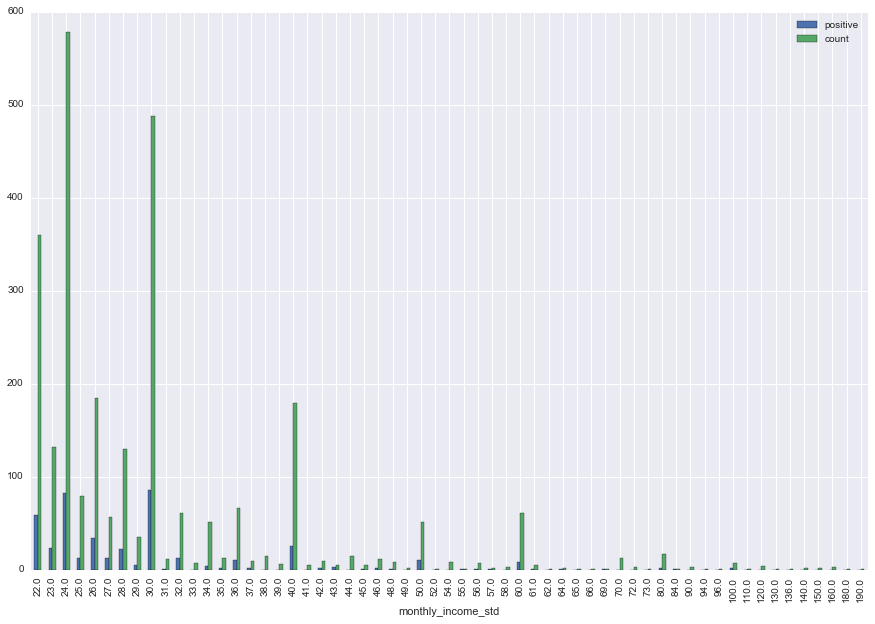

In [100]:
train[train['monthly_income_std'] > 21].groupby(['monthly_income_std'])['open_account_flg'].agg({'count': np.size, 'positive': np.sum}).plot.bar()

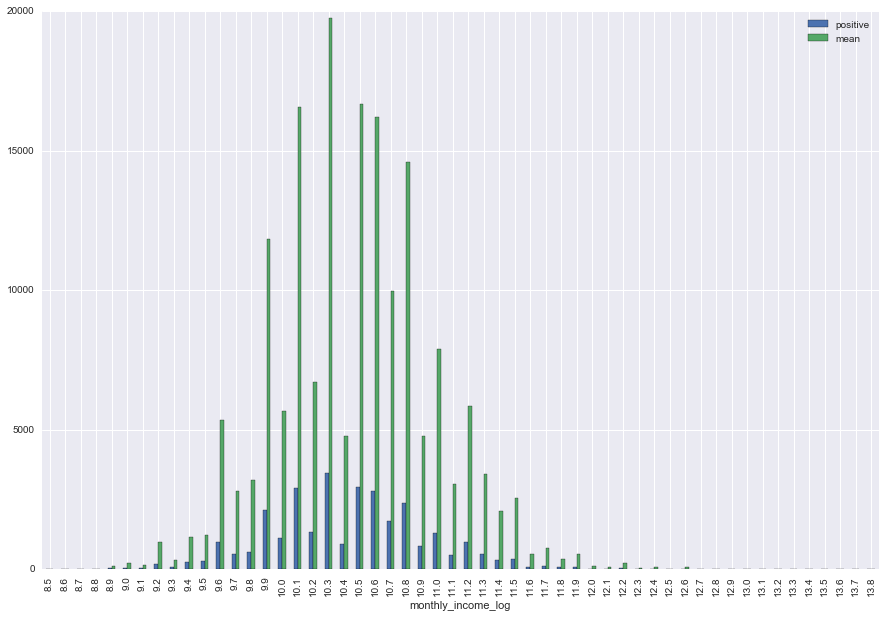

In [117]:
train['monthly_income_log'] = np.round(np.log(train['monthly_income']), decimals=1)
train.groupby(['monthly_income_log'])['open_account_flg'].agg({'mean': np.size, 'positive': np.sum}).plot.bar()

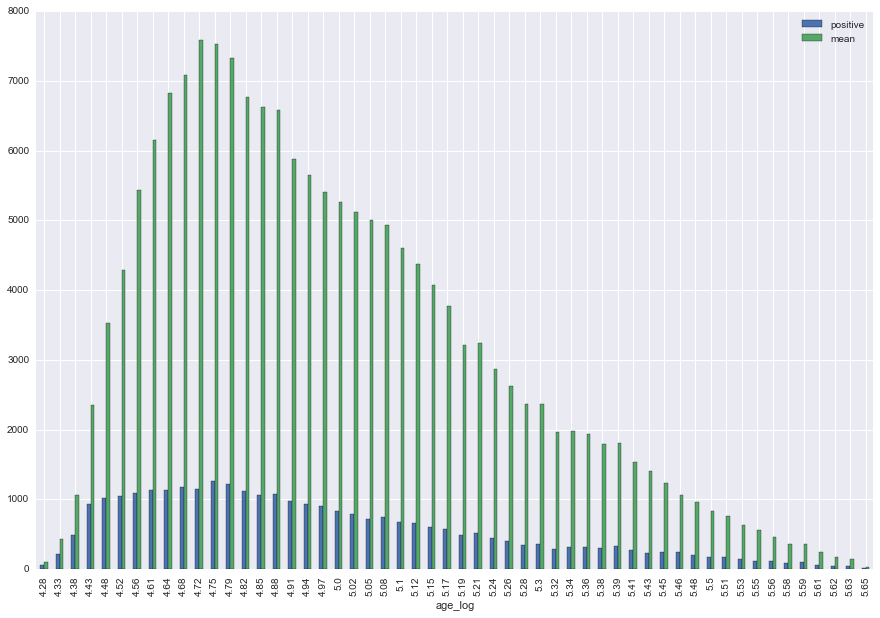

In [128]:
train['age_log'] = np.round(np.log(train['age'] * 4), decimals=2)
train.groupby(['age_log'])['open_account_flg'].agg({'mean': np.size, 'positive': np.sum}).plot.bar()

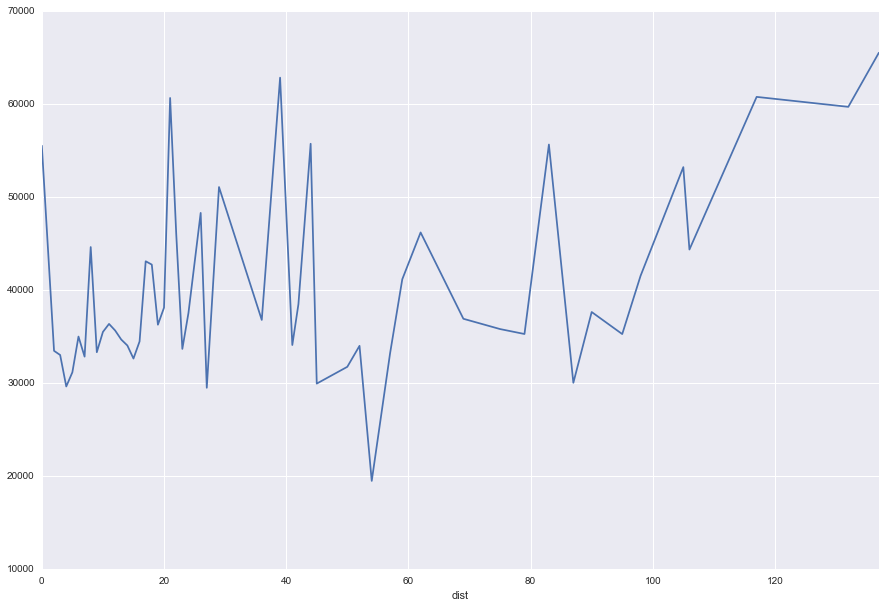

In [146]:
train['dist'] = np.round(np.sqrt(np.power(train['lon'] - 37.617635, 2) + np.power(train['lat'] - 55.755814, 2)))
train[train['monthly_income'] < 200000].groupby(['dist'])['monthly_income'].mean().plot()

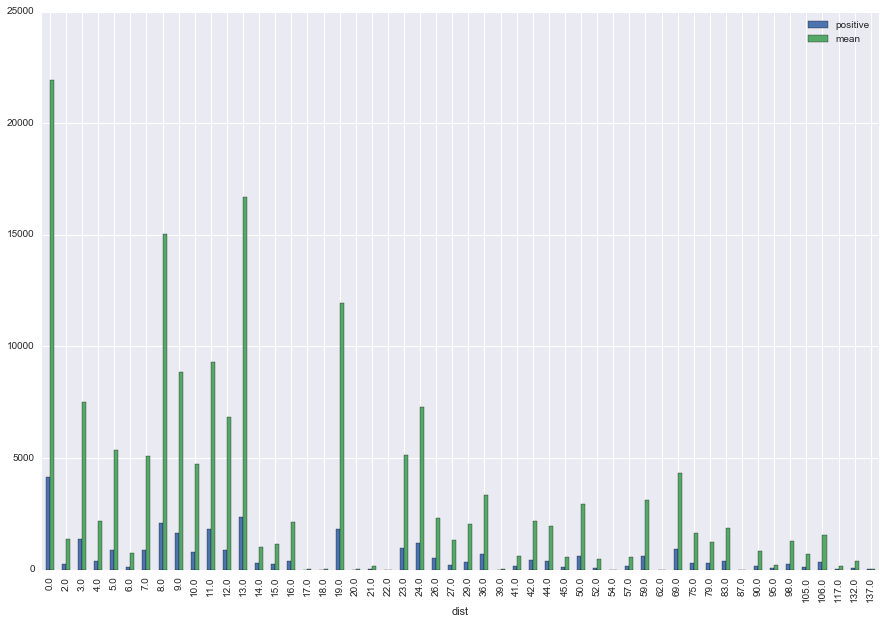

In [148]:
train[train['monthly_income'] < 200000].groupby(['dist'])['open_account_flg'].agg({'mean': np.size, 'positive': np.sum}).plot.bar()